In [ ]:
# LIBRARIES

import matplotlib.pyplot as plt
import seaborn as sns 
import time
import pandas as pd
import numpy as np
import datetime
from itertools import combinations
from collections import Counter

In [16]:
s=pd.read_csv('SPOKE Orders - Analysis Task.csv')

In [110]:
s.head()

,product_title,product_vendor,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity,Waist
0,Gift Card,SPOKE,Gift Card,100,5b978d8936953,42714701065,2101736645,837678000000,2018-12-04,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2,10
1,Charcoal,Spoke,Sharps,28 Build A Made To Measure,MTM-SHP-DRK-GRY-Z-000000,21778900000000,603222000000,961220000000,2019-04-01,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2,28
2,Fawn Cord,SPOKE,Cord Fives,32 Build B Finished to Order,WW-CRD-MID-BRN-D-32B0000,12521700000000,852469000000,632762000000,2018-11-05,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2,32
3,Ammonite,Spoke,Hardys,40 Build B Finished to Order,PR-HDY-MED-BRN-D-40B0000,21513000000000,734218000000,921052000000,2019-02-19,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,40
4,Ammonite,Spoke,Hardys,40 Build B Finished to Order,PR-HDY-MED-BRN-D-40B0000,21513000000000,734218000000,921054000000,2019-02-19,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,40


In [111]:
s.shape

(70052, 19)

In [112]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   product_title           70052 non-null  object        
 1   product_vendor          70052 non-null  object        
 2   product_type            70052 non-null  object        
 3   variant_title           70052 non-null  object        
 4   variant_sku             70052 non-null  object        
 5   variant_id              70052 non-null  int64         
 6   customer_id             70052 non-null  int64         
 7   order_id                70052 non-null  int64         
 8   day                     70052 non-null  datetime64[ns]
 9   net_quantity            70052 non-null  int64         
 10  gross_sales             70052 non-null  float64       
 11  discounts               70052 non-null  float64       
 12  returns                 70052 non-null  float6

In [20]:
# to convert the date column
s['day'] =  pd.to_datetime(s['day'],
                              format='%d/%m/%Y')

# Confirm the date column is in datetime format
print(s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   product_title           70052 non-null  object        
 1   product_vendor          70052 non-null  object        
 2   product_type            70052 non-null  object        
 3   variant_title           70052 non-null  object        
 4   variant_sku             70052 non-null  object        
 5   variant_id              70052 non-null  int64         
 6   customer_id             70052 non-null  int64         
 7   order_id                70052 non-null  int64         
 8   day                     70052 non-null  datetime64[ns]
 9   net_quantity            70052 non-null  int64         
 10  gross_sales             70052 non-null  float64       
 11  discounts               70052 non-null  float64       
 12  returns                 70052 non-null  float6

### 1. On what day did we make the most Gross Sales?

Why would it make sense for this to be our biggest sales day?

What are the characteristics of this day compared to an average day of sales at SPOKE?

<AxesSubplot:xlabel='day'>

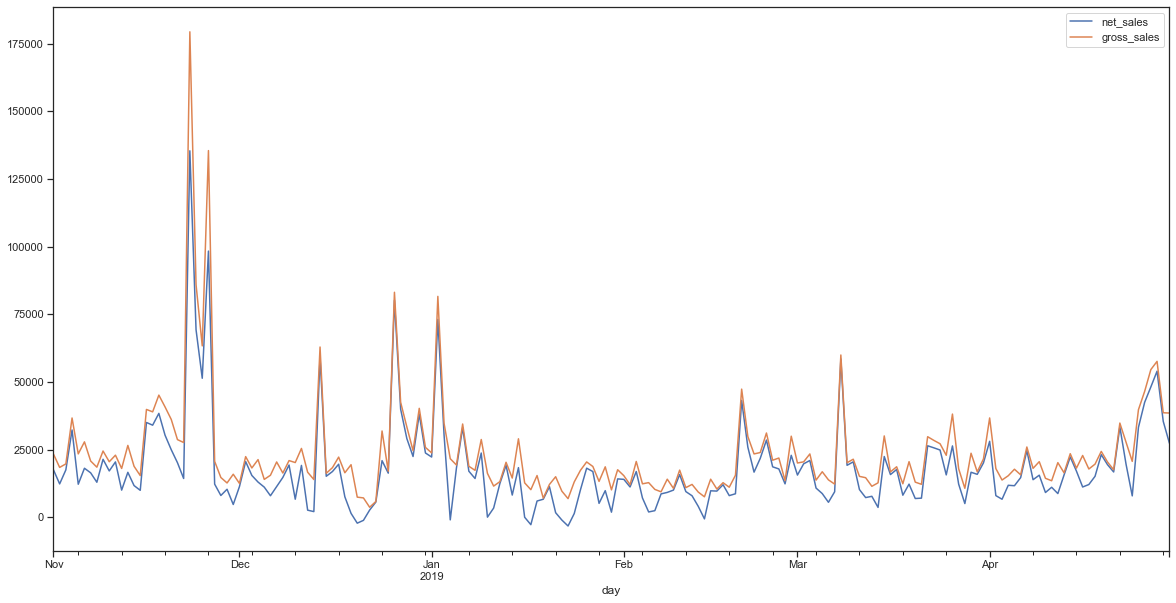

In [29]:
# to convert the date column

df_items = s[["day", "net_sales","gross_sales"]]
df_items.groupby("day").sum().plot(kind="line", figsize=(20, 10))

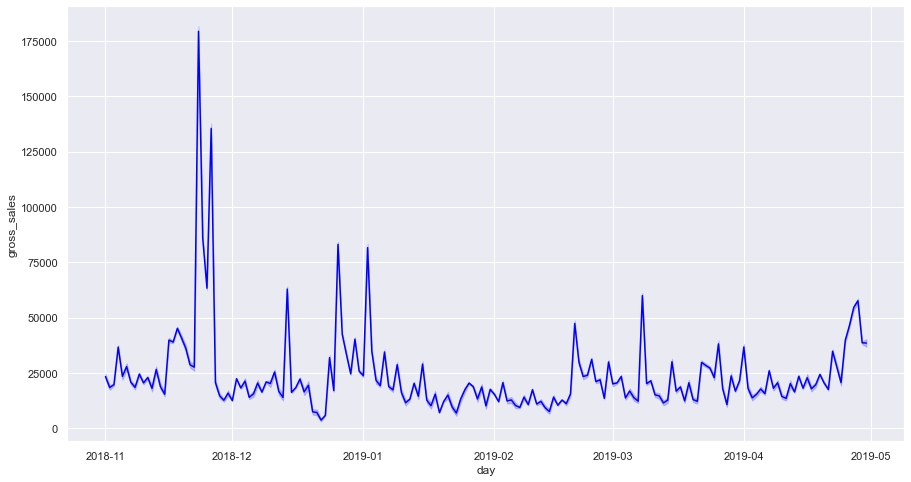

In [81]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))              
sns.lineplot(data=s, x="day", y="gross_sales", color="blue", estimator=sum)
plt.show()

In [52]:
day_sales = pd.DataFrame(s.groupby('day').sum()['gross_sales'])

day_sales.sort_values(by=['gross_sales'], inplace=True, ascending=False)

day_sales = day_sales.head(10)

day_sales

,gross_sales
day,
2018-11-23,179394.23
2018-11-26,135499.95
2018-11-24,85951.77
2018-12-26,83141.42
2019-01-02,81625.21
2018-11-25,63326.32
2018-12-14,62913.18
2019-03-08,59965.48
2019-04-28,57607.86


RESULTS:  The gross sales reached its the peak point during Christmas period. SPOKE's biggest sales day were seen between 23 Nov and 26 Nov 2018. I checked out the days on calender and found that 23 Nov Black Friday in 2018 contributed the most. The third biggest sales were coming from Boxing Day and fourth was on New Year Holiday. 

Between January and the mid March, The sales staggered and after it started to increase again. I think People moved into a holiday or summer shopping mindset  before and after their easter break. 
Many people tend to go on holiday or break between Easter  and May bank Holiday day. Therefore, The last big gross sales were seen between 27th April and 28April.  
(Easter Monday is on 22 April, May bank holiday is on 06 May in 2018)




### 2. Which product type did we sell the most units of?

What business decisions could we make knowing this information?

In [53]:
prod_units = pd.DataFrame(s.groupby('product_type').sum()['net_quantity'])

prod_units.sort_values(by=['net_quantity'], inplace=True, ascending=False)

top_20_prods = prod_units.head(20)

top_20_prods

,net_quantity
product_type,
Sharps,16205
Heroes,10898
Fives,4728
Cord Fives,2472
Polo,2306
Winter Heroes,1771
Bulletproofs,1766
Cord Sharps,1760
T-Shirts,1546


<AxesSubplot:xlabel='product_title'>

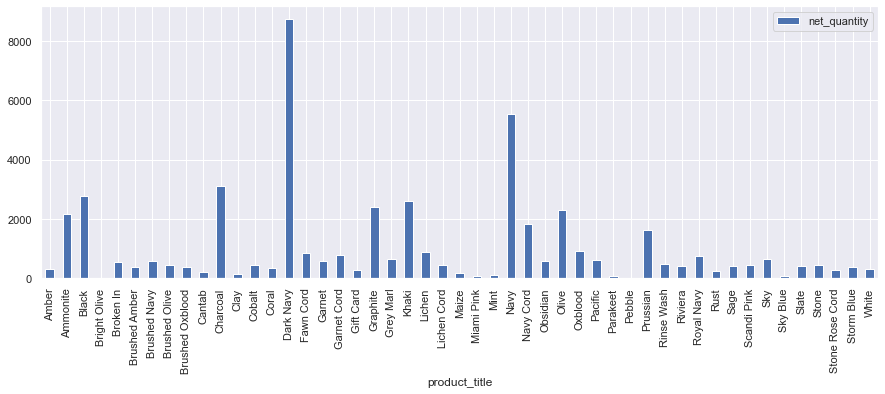

In [125]:
# comparing net sold units vs product type
df_items = s[["product_title", "net_quantity"]]
df_items.groupby("product_title").sum().plot(kind="bar", figsize=(15, 5))

Sharps ( Smart category), Heroes ( Smart/Casual) and Fives ( Casual category) product types contributed the most selling items in terms of quantity and sales in SPOKE. The numbers and graph shows that customers chose SPOKE for its mainly smart trousers. I think there is a big opportunity if SPOKE utize tops align with bottoms. 

### 3. What does the distribution of waist sizes look like?

What does this say about our existing customer base?

In [66]:
s['variant_title'] = s['variant_title'].str.replace('/','')
# For string columns
s['Waist'] = [x[0:2] for x in s['variant_title']]


In [67]:
# Waist sizes is found from website
Waist_sizes= [28,30,31,32,33,34,35,36,37,38,40]


distribution_of_waist_sizes = pd.DataFrame(s.groupby('Waist').sum()['net_quantity'])

distribution_of_waist_sizes.sort_values(by=['net_quantity'], inplace=True, ascending=False)

top_prods = distribution_of_waist_sizes.head(15)

top_prods

,net_quantity
Waist,
34,9328
32,7502
36,6352
33,5811
35,3843
38,3605
31,2618
30,2205
37,1735


<AxesSubplot:>

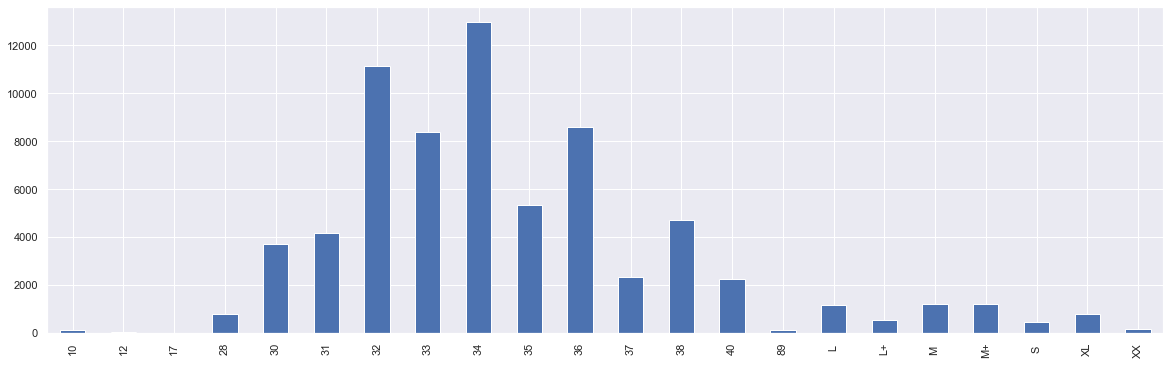

In [127]:
# quantity-by-size
s['Waist'].value_counts()
s.Waist.value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(20, 6))


The top-selling waist size in the SPOKE is  34 followed by 32 and 36.


Advantage of this analysis;

1-Many Fashion ecommerce are linked with size and fitting issue. If SPOKE develops the Right product Size and it means that reduces Order Returns. Analysing the distribution of sizing is one of the important element to eliminate returns and terminal stocks. 

2-If SPOKE order each style with the right size ratio, missing sales  will be elimated. 

3-Designers can understand customer body shapes better and develop products accordingly.

4-Best Practice for Creating a Size Chart for developers.

5-when merchandiser place the order, Correct sizing ratio helps to optimise costing and margin.


### 4. What is our unit return rate?

Bonus points: what is our unit return rate for customers who ordered multiple sizes?

In [ ]:
#unit return rate: simply dividing the number of items returned by the number that has been sold

In [128]:
new_s= s.groupby(
   [ 'customer_id', 'order_id', 'product_type']
).agg(
    {
         'ordered_item_quantity':sum,    # Sum quantity per ordered_item_group
         'returned_item_quantity':sum,    # Sum quantity per returned_item_group 
         'Waist': "nunique",  # get unique of variant_title'
           
    }
)

Return_table= new_s.loc[(new_s['Waist'] > 1) & (new_s['returned_item_quantity'] < 0)]
Return_table


,,,ordered_item_quantity,returned_item_quantity,Waist
customer_id,order_id,product_type,,,
269795041,819656000000,Heroes,2,-2,2
313645429,877234000000,Hardys,2,-1,2
373618252,873014000000,Winter Heroes,2,-1,2
386969560,576143000000,Sharps,0,-2,2
400855376,622034000000,Polo,0,-4,2
...,...,...,...,...,...
1713940000000,1019840000000,Sharps,2,-1,2
1714990000000,1020700000000,Heroes,3,-3,2
1744020000000,1023540000000,Heroes,6,-2,2


In [129]:
# Return rate for customers who ordered more than one size
return_rate= -Return_table['returned_item_quantity'].sum()/Return_table['ordered_item_quantity'].sum()
return_rate

0.7669576897246474

 Customers who are ordered multiple size return rate is 76%. It seems quite high. 

### Some open ended questions we’d like you to consider are:

1. Did you find anything interesting in the way this data is structured?

2. What other analysis could we run using this data?

Don’t worry if you don’t feel like you’re able to answer all the questions - and please don’t feel pressured to spend a lot of time working on this. If you’re pressed for time, it’s okay for you to explain how you would go about approaching some questions without conducting the full analysis.

We wouldn’t want you spending more than a couple hours on this task – but if you find this kind of work fun then we think you’d be a good fit for the data team we’re building!

### Further Analysis

### 4.What Products Are Most Often Sold Together?

In [103]:
from itertools import combinations
from collections import Counter

In [104]:
new_s=s[s['order_id'].duplicated(keep=False)]
new_s.head()

,product_title,product_vendor,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity,Waist
0,Gift Card,SPOKE,Gift Card,100,5b978d8936953,42714701065,2101736645,837678000000,2018-12-04,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2,10
2,Fawn Cord,SPOKE,Cord Fives,32 Build B Finished to Order,WW-CRD-MID-BRN-D-32B0000,12521700000000,852469000000,632762000000,2018-11-05,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2,32
3,Ammonite,Spoke,Hardys,40 Build B Finished to Order,PR-HDY-MED-BRN-D-40B0000,21513000000000,734218000000,921052000000,2019-02-19,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,40
4,Ammonite,Spoke,Hardys,40 Build B Finished to Order,PR-HDY-MED-BRN-D-40B0000,21513000000000,734218000000,921054000000,2019-02-19,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,40
5,Prussian,Spoke,Hardys,40 Build B Finished to Order,PR-HDY-DRK-BLU-E-40B0000,21513000000000,734218000000,921052000000,2019-02-19,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,40


In [105]:
# created new columns to see what products and variant tile are most often sold together?
new_s['product_bundle']=new_s.groupby('order_id')['product_type'].transform(lambda x: '|'.join(x))
new_s['Waist_bundle']=new_s.groupby('order_id')['Waist'].transform(lambda x: '|'.join(x))
new_s.head()


<ipython-input-105-469a3a0d67f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_s['product_bundle']=new_s.groupby('order_id')['product_type'].transform(lambda x: '|'.join(x))
<ipython-input-105-469a3a0d67f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_s['Waist_bundle']=new_s.groupby('order_id')['Waist'].transform(lambda x: '|'.join(x))


,product_title,product_vendor,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,...,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity,Waist,product_bundle,Waist_bundle
0,Gift Card,SPOKE,Gift Card,100,5b978d8936953,42714701065,2101736645,837678000000,2018-12-04,2,...,-200.00,0.00,0.0,0.0,0.0,0,2,10,Gift Card|Cord Fives,10|36
2,Fawn Cord,SPOKE,Cord Fives,32 Build B Finished to Order,WW-CRD-MID-BRN-D-32B0000,12521700000000,852469000000,632762000000,2018-11-05,0,...,-156.56,-8.24,0.0,0.0,0.0,-2,2,32,Cord Fives|Sharps|Heroes,32|32|32
3,Ammonite,Spoke,Hardys,40 Build B Finished to Order,PR-HDY-MED-BRN-D-40B0000,21513000000000,734218000000,921052000000,2019-02-19,1,...,-119.00,0.00,0.0,0.0,0.0,0,1,40,Hardys|Hardys|Hardys|Hardys,40|40|40|40
4,Ammonite,Spoke,Hardys,40 Build B Finished to Order,PR-HDY-MED-BRN-D-40B0000,21513000000000,734218000000,921054000000,2019-02-19,1,...,-119.00,0.00,0.0,0.0,0.0,0,1,40,Hardys|Hardys|Sharps|Heroes,40|40|40|40
5,Prussian,Spoke,Hardys,40 Build B Finished to Order,PR-HDY-DRK-BLU-E-40B0000,21513000000000,734218000000,921052000000,2019-02-19,1,...,-119.00,0.00,0.0,0.0,0.0,0,1,40,Hardys|Hardys|Hardys|Hardys,40|40|40|40


Comment: We have the same order at least twice because we did merge them in every situation in groupby without dropping the duplicate values. Now let’s drop the rows with duplicate values.


In [121]:
new_s=new_s[['order_id','product_bundle']].drop_duplicates()
new_s.head()

,order_id,product_bundle
0,837678000000,Gift Card|Cord Fives
2,632762000000,Cord Fives|Sharps|Heroes
3,921052000000,Hardys|Hardys|Hardys|Hardys
4,921054000000,Hardys|Hardys|Sharps|Heroes
7,921873000000,Hardys|Heroes|Jeans|Jeans|Jeans|Hardys|Heroes


Now, we need to count the pair of variants. We need new libraries because they have all we need to count all the combination of products bundle. We’re gonna use itertools and collections libraries.


In [123]:
count=Counter()
for row in new_s['product_bundle']:
    row_list=row.split('|')
    count.update(Counter(combinations(row_list,3))) # counting all the 3 variant bundle

In [124]:
count.most_common(20)

[(('Sharps', 'Sharps', 'Sharps'), 14448),
 (('Sharps', 'Heroes', 'Heroes'), 9705),
 (('Heroes', 'Heroes', 'Heroes'), 9456),
 (('Sharps', 'Sharps', 'Heroes'), 8400),
 (('T-Shirts', 'T-Shirts', 'T-Shirts'), 5922),
 (('Sharps', 'Heroes', 'Sharps'), 5798),
 (('Jeans', 'Jeans', 'Jeans'), 4798),
 (('Sharps', 'Heroes', 'Sharp Shorts'), 4664),
 (('Heroes', 'Sharps', 'Heroes'), 4455),
 (('Heroes', 'Sharps', 'Sharps'), 4257),
 (('Heroes', 'Heroes', 'Sharp Shorts'), 4094),
 (('Sharps', 'Sharps', 'Fives'), 4025),
 (('Heroes', 'Heroes', 'Sharps'), 3654),
 (('Sharps', 'Sharps', 'Sharp Shorts'), 3605),
 (('Sharps', 'Heroes', 'Polo'), 3031),
 (('Sharps', 'Heroes', 'Fives'), 2693),
 (('Heroes', 'Heroes', 'Polo'), 2568),
 (('Sharps', 'Fives', 'Heroes'), 2416),
 (('Sharps', 'Sharps', 'Polo'), 2395),
 (('Fives', 'Heroes', 'Heroes'), 2352)]

In [ ]:
# Same method could be applied to variant bundle and find out which sizes are bought together.

In [110]:
# I also wanted to check the most returned products

returned_item_quantity = pd.DataFrame(s.groupby('product_type').sum()['returned_item_quantity'])

returned_item_quantity.sort_values(by=['returned_item_quantity'], inplace=True, ascending=True)


top_return_prods = returned_item_quantity.head(10)


top_return_prods

,returned_item_quantity
product_type,
Sharps,-3753
Heroes,-2612
Fives,-1219
Polo,-548
Cord Fives,-534
Winter Heroes,-466
Cord Sharps,-357
Bulletproofs,-356
T-Shirts,-331


Comments: The result shows that Returned items are inline with most sold product_type. Only POLO caught my attention. It could looked into more details. I think this list shows that people really liked Sharps, Heroes and Fives trousers, probably they return because of sizing and fit.

<AxesSubplot:xlabel='product_title'>

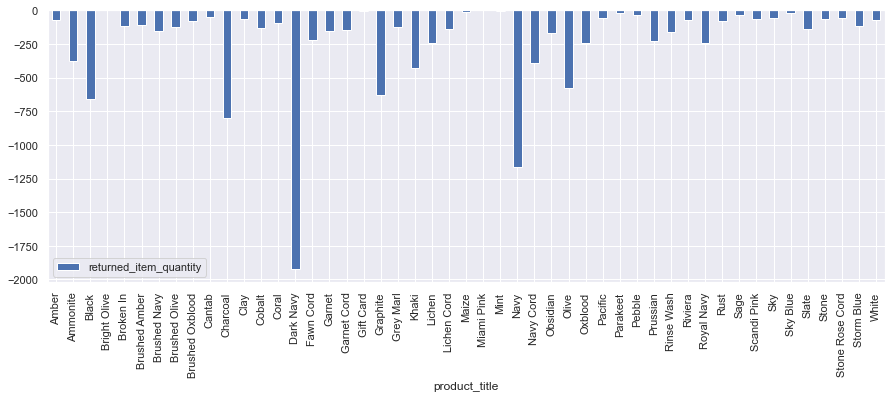

In [120]:
# comparing net sold units vs product type
df_items = s[["product_title", "returned_item_quantity"]]
df_items.groupby("product_title").sum().plot(kind="bar", figsize=(15, 5))

 Main Returned colours are the core colours such Dark Navy, Navy and Charcoal